In [28]:
import random
import pandas as pd 
import numpy as np 
from matplotlib import pyplot as plt 
%matplotlib inline

In [5]:
df = pd.read_csv('homeprices_banglore.csv')
df.head(5)

,area,bedrooms,price
0,1056,2,39.07
1,2600,4,120.00
2,1440,3,62.00
3,1521,3,75.00
4,1200,2,51.00


In [17]:
from sklearn import preprocessing

sx = preprocessing.MinMaxScaler()
sy = preprocessing.MinMaxScaler()

scaled_X = sx.fit_transform(df.drop('price', axis= 'columns'))
scaled_X


array([[0.08827586, 0.25      ],
       [0.62068966, 0.75      ],
       [0.22068966, 0.5       ],
       [0.24862069, 0.5       ],
       [0.13793103, 0.25      ],
       [0.12758621, 0.25      ],
       [0.6662069 , 0.75      ],
       [0.86206897, 0.75      ],
       [0.17586207, 0.5       ],
       [1.        , 1.        ],
       [0.34482759, 0.5       ],
       [0.68448276, 0.75      ],
       [0.06896552, 0.25      ],
       [0.10344828, 0.25      ],
       [0.5       , 0.5       ],
       [0.12931034, 0.25      ],
       [0.13103448, 0.5       ],
       [0.25517241, 0.5       ],
       [0.67931034, 0.5       ],
       [0.        , 0.        ]])

In [21]:
scaled_y = sy.fit_transform(df['price'].values.reshape(df.shape[0], 1))
scaled_y

array([[0.05237037],
       [0.65185185],
       [0.22222222],
       [0.31851852],
       [0.14074074],
       [0.04444444],
       [0.76296296],
       [0.91111111],
       [0.13333333],
       [1.        ],
       [0.37037037],
       [0.8       ],
       [0.04444444],
       [0.05925926],
       [0.51111111],
       [0.07407407],
       [0.11851852],
       [0.20740741],
       [0.51851852],
       [0.        ]])

In [7]:
w = np.ones(shape=2)

In [8]:
np.dot(w, scaled_X.T)

array([0.33827586, 1.37068966, 0.72068966, 0.74862069, 0.38793103,
       0.37758621, 1.4162069 , 1.61206897, 0.67586207, 2.        ,
       0.84482759, 1.43448276, 0.31896552, 0.35344828, 1.        ,
       0.37931034, 0.63103448, 0.75517241, 1.17931034, 0.        ])

In [9]:
a = np.array([1, 2, 3])
b = np.array([10, 5, 7])

a-b

array([-9, -3, -4])

In [10]:
np.square(a-b)

array([81,  9, 16])

In [11]:
np.mean(np.square(a-b))

35.333333333333336

## Batch Gradient Descent

In [12]:
def batch_gradient_descent(X, y_true, epochs, learning_rate = 0.01):
    number_of_features = X.shape[1]

    w = np.ones(shape= number_of_features)
    b = 0
    total_samples = X.shape[0]


    cost_list = []
    epoch_list = []
    
    for i in range(epochs):
        y_predicted = np.dot(w, scaled_X.T) + b

        w_grad = -(2/total_samples)*(X.T.dot(y_true-y_predicted))
        b_grad = -(2/total_samples)*np.sum(y_true-y_predicted)

        w -= (learning_rate*w_grad)
        b -= (learning_rate*b_grad)

        cost = np.mean(np.square(y_true-y_predicted))


        if i%10 == 0:
            cost_list.append(cost)
            epoch_list.append(i)

        
        return w, b, cost, cost_list, epoch_list
    

w, b, cost, cost_list, epoch_list = batch_gradient_descent(scaled_X, scaled_y.reshape(scaled_y.shape[0],),500)
w, b, cost

(array([0.99551317, 0.99445655]), -0.009603223499361428, 0.2768777174681)

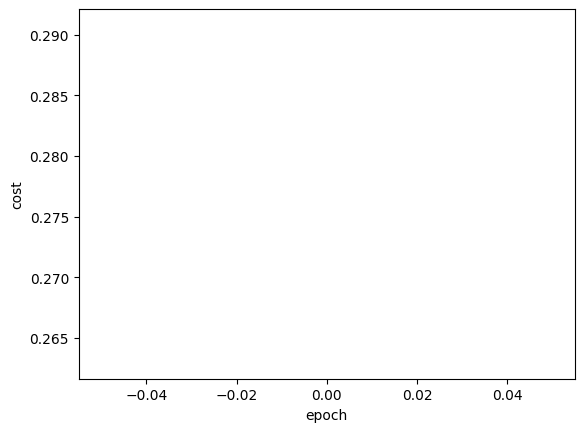

In [13]:
plt.xlabel('epoch')
plt.ylabel('cost')
plt.plot(epoch_list, cost_list)

In [18]:
sx.transform([[2600, 4]])

c:\Users\shahs_snohmej\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


array([[0.62068966, 0.75      ]])

In [19]:
w

array([0.99551317, 0.99445655])

In [24]:
                         #mid
sy.inverse_transform([[1, 0.5, 0]]) #max=167, min= 32

array([[167. ,  99.5,  32. ]])

In [26]:
def predict(area, bedrooms, w, b):
    scaled_X = sx.transform([[area, bedrooms]])[0]

    scaled_price = w[0]*scaled_X[0] + w[1]*scaled_X[1] + b
    return sy.inverse_transform([[scaled_price]])[0][0]


predict(2600, 4, w, b)

c:\Users\shahs_snohmej\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


214.80942930337545

In [27]:
predict(1000, 2, w, b)

c:\Users\shahs_snohmej\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


73.53504444845935

## Stochastic Gradient descent

In [29]:
def stochastic_gradient_descent(X, y_true, epochs, learning_rate = 0.01):
    number_of_features = X.shape[1]

    w = np.ones(shape= number_of_features)
    b = 0
    total_samples = X.shape[0]


    cost_list = []
    epoch_list = []
    
    for i in range(epochs):
        random_index = random.randint(0, total_samples-1)
        sample_x = X[random_index]
        sample_y = y_true[random_index]
        y_predicted = np.dot(w, sample_x.T) + b

        w_grad = -(2/total_samples)*(sample_x.T.dot(sample_y-y_predicted))
        b_grad = -(2/total_samples)*(sample_y-y_predicted)

        w -= (learning_rate*w_grad)
        b -= (learning_rate*b_grad)

        cost = np.square(sample_y-y_predicted)


        if i%100 == 0:
            cost_list.append(cost)
            epoch_list.append(i)

        
        return w, b, cost, cost_list, epoch_list
    

w_sgd, b_sgd, cost_sgd, cost_list_sgd, epoch_list_sgd = stochastic_gradient_descent(scaled_X, scaled_y.reshape(scaled_y.shape[0],), 10000)
w_sgd, b_sgd, cost_sgd

(array([0.9999575 , 0.99991671]), -0.00033314176245210727, 0.11098343388969625)

In [30]:
w, b, cost

(array([0.99551317, 0.99445655]), -0.009603223499361428, 0.2768777174681)

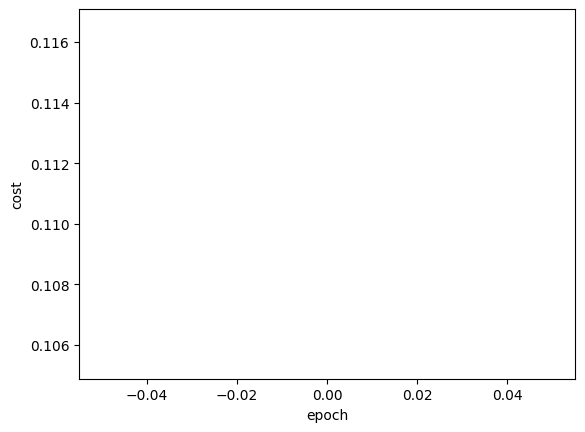

In [31]:
plt.xlabel('epoch')
plt.ylabel('cost')
plt.plot(epoch_list_sgd, cost_list_sgd)

In [32]:
predict(2600, 4, w_sgd, b_sgd)

c:\Users\shahs_snohmej\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


216.9861350927928